In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session()

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6928
Epoch: 1/20... Training loss: 0.6897
Epoch: 1/20... Training loss: 0.6863
Epoch: 1/20... Training loss: 0.6819
Epoch: 1/20... Training loss: 0.6759
Epoch: 1/20... Training loss: 0.6696
Epoch: 1/20... Training loss: 0.6613
Epoch: 1/20... Training loss: 0.6513
Epoch: 1/20... Training loss: 0.6415
Epoch: 1/20... Training loss: 0.6282
Epoch: 1/20... Training loss: 0.6142
Epoch: 1/20... Training loss: 0.5974
Epoch: 1/20... Training loss: 0.5809
Epoch: 1/20... Training loss: 0.5681
Epoch: 1/20... Training loss: 0.5475
Epoch: 1/20... Training loss: 0.5270
Epoch: 1/20... Training loss: 0.5099
Epoch: 1/20... Training loss: 0.4924
Epoch: 1/20... Training loss: 0.4724
Epoch: 1/20... Training loss: 0.4556
Epoch: 1/20... Training loss: 0.4434
Epoch: 1/20... Training loss: 0.4234
Epoch: 1/20... Training loss: 0.4124
Epoch: 1/20... Training loss: 0.3890
Epoch: 1/20... Training loss: 0.3811
Epoch: 1/20... Training loss: 0.3648
Epoch: 1/20... Training loss: 0.3698
E

Epoch: 1/20... Training loss: 0.1974
Epoch: 1/20... Training loss: 0.1974
Epoch: 1/20... Training loss: 0.2024
Epoch: 1/20... Training loss: 0.2079
Epoch: 1/20... Training loss: 0.2028
Epoch: 1/20... Training loss: 0.1969
Epoch: 1/20... Training loss: 0.2009
Epoch: 1/20... Training loss: 0.1943
Epoch: 1/20... Training loss: 0.1958
Epoch: 1/20... Training loss: 0.1965
Epoch: 1/20... Training loss: 0.1918
Epoch: 1/20... Training loss: 0.1997
Epoch: 1/20... Training loss: 0.1901
Epoch: 1/20... Training loss: 0.1982
Epoch: 1/20... Training loss: 0.1871
Epoch: 1/20... Training loss: 0.1938
Epoch: 1/20... Training loss: 0.1908
Epoch: 1/20... Training loss: 0.1948
Epoch: 1/20... Training loss: 0.1934
Epoch: 1/20... Training loss: 0.1899
Epoch: 1/20... Training loss: 0.1909
Epoch: 1/20... Training loss: 0.1926
Epoch: 1/20... Training loss: 0.1919
Epoch: 1/20... Training loss: 0.1965
Epoch: 1/20... Training loss: 0.1951
Epoch: 1/20... Training loss: 0.1969
Epoch: 1/20... Training loss: 0.1922
E

Epoch: 2/20... Training loss: 0.1625
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1551
Epoch: 2/20... Training loss: 0.1465
Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1564
Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1540
Epoch: 2/20... Training loss: 0.1575
Epoch: 2/20... Training loss: 0.1603
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1547
Epoch: 2/20... Training loss: 0.1522
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1505
Epoch: 2/20... Training loss: 0.1497
Epoch: 2/20... Training loss: 0.1527
Epoch: 2/20... Training loss: 0.1586
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1586
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1511
E

Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1281
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1305
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1329
Epoch: 3/20... Training loss: 0.1330
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1299
Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1321
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1322
Epoch: 3/20... Training loss: 0.1344
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1334
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1342
Epoch: 3/20... Training loss: 0.1341
E

Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1173
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1189
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1166
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1187
E

Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1152
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1159
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1160
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1068
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1146
Epoch: 5/20... Training loss: 0.1136
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1103
E

Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1093
Epoch: 6/20... Training loss: 0.1101
Epoch: 6/20... Training loss: 0.1102
Epoch: 6/20... Training loss: 0.1112
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1084
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1096
Epoch: 6/20... Training loss: 0.1092
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1057
E

Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1054
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1078
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1091
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1046
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1067
Epoch: 7/20... Training loss: 0.1052
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1034
E

Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.0969
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1018
Epoch: 8/20... Training loss: 0.1040
Epoch: 8/20... Training loss: 0.1023
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.1022
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.1023
Epoch: 8/20... Training loss: 0.1027
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0998
E

Epoch: 8/20... Training loss: 0.1017
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0978
E

Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0933
Epoch: 9/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0937
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0934
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0896
Epoch: 9/20... Training loss: 0.1010
Epoch: 9/20... Training loss: 0.0951
E

Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0996
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0910
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0915
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0994
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0973
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0987
Epoch: 12/20... Training loss: 0.0909
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0913
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0906
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0899
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0978
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0907
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0980
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0896
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0873
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0973
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0903
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0974
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0902
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0908
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0973
Epoch: 15/20... Training loss: 0.0900
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0976
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0904
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0904
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0970
Epoch: 16/20... Training loss: 0.0978
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0972
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0905
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0891
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0895
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0964
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0902
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0876
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0888
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0891
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0892
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0978
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0982
Epoch: 20/20... Training loss: 0.0891
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0895
Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0969
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0918


## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [80]:
sess.close()

### Let us Load Russell 3K 

In [5]:
import pandas as pd
import matplotlib.dates as mdates

In [6]:
def get_returns_daily_df():
    df = pd.read_csv(r'C:\phd\ae\data\russell3000.csv')
    df.set_index(df['Dates'], inplace=True)
    df.drop('Dates', axis=1, inplace=True)
    df_ret = np.log(df / df.shift())
    return df_ret.iloc[1:]

In [8]:
df = get_returns_daily_df()

C:\ProgramData\Anaconda3\envs\deep_learning\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


In [9]:
i = 425
width = 60
data = df[i:i+width].copy()
data.dropna(axis=1, inplace=True)
ds = df.index[i+width-1]

Text(0.5,1,'Original Training Matrix - 12/2/1987')

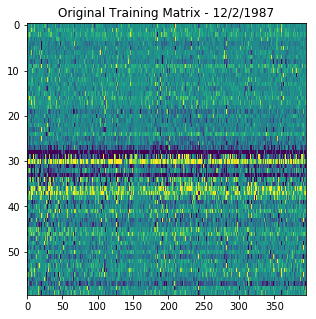

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
axes.imshow(data, vmin=-0.1, vmax=0.1, aspect='auto')
axes.set_title('Original Training Matrix - ' + ds)
# axes.yaxis_date()
# date_format = mdates.DateFormatter('%m%d%Y')
# axes.yaxis.set_major_formatter(date_format)

### Auto Encoder's Architecture

In [45]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32

# We have 60 x 395 matrix
data_size = data.shape[0] * data.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, data_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, data_size), name='targets')

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, data_size, activation=None)
# Sigmoid output from
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

### Training

In [46]:
# Create the session
sess = tf.Session()

In [47]:
epochs = 20
batch_size = width
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(width):
        batch = np.reshape(data.iloc[ii], (-1, 60, 395, 1))
        feed = {inputs_: batch, targets_: batch}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))


ValueError: cannot reshape array of size 395 into shape (60,395,1)

In [66]:
sess.close()

0

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.examples.tutorials.mnist import input_data
# from tensorflow.contrib.layers import fully_connected

# mnist=input_data.read_data_sets("/MNIST_data/",one_hot=True)

# num_inputs = 784    #28x28 pixels
# num_hid1 = 392
# num_hid2 = 196
# num_hid3 = num_hid1
# num_output = num_inputs
# lr = 0.01
# actf=tf.nn.relu

# X = tf.placeholder(tf.float32,shape=[None,num_inputs])
# initializer = tf.variance_scaling_initializer()

# w1 = tf.Variable(initializer([num_inputs,num_hid1]),dtype=tf.float32)
# w2 = tf.Variable(initializer([num_hid1,num_hid2]),dtype=tf.float32)
# w3 = tf.Variable(initializer([num_hid2,num_hid3]),dtype=tf.float32)
# w4 = tf.Variable(initializer([num_hid3,num_output]),dtype=tf.float32)

# b1 = tf.Variable(tf.zeros(num_hid1))
# b2 = tf.Variable(tf.zeros(num_hid2))
# b3 = tf.Variable(tf.zeros(num_hid3))
# b4 = tf.Variable(tf.zeros(num_output))

# hid_layer1 = actf(tf.matmul(X,w1)+b1)
# hid_layer2 = actf(tf.matmul(hid_layer1,w2)+b2)
# hid_layer3 = actf(tf.matmul(hid_layer2,w3)+b3)
# output_layer = actf(tf.matmul(hid_layer3,w4)+b4)

# loss = tf.reduce_mean(tf.square(output_layer-X))

# optimizer = tf.train.AdamOptimizer(lr)
# train = optimizer.minimize(loss)

# init = tf.global_variables_initializer()

# num_epoch=5
# batch_size=150
# num_test_images=10

# with tf.Session() as sess:
#     sess.run(init)
#     for epoch in range(num_epoch):
        
#         num_batches=mnist.train.num_examples//batch_size
#         for iteration in range(num_batches):
#             X_batch,y_batch=mnist.train.next_batch(batch_size)
#             sess.run(train,feed_dict={X:X_batch})
            
#         train_loss=loss.eval(feed_dict={X:X_batch})
#         print("epoch {} loss {}".format(epoch,train_loss))

# results=output_layer.eval(feed_dict={X:mnist.test.images[:num_test_images]})
    
# #Comparing original images with reconstructions
# f,a=plt.subplots(2,10,figsize=(20,4))
# for i in range(num_test_images):
#     a[0][i].imshow(np.reshape(mnist.test.images[i],(28,28)))
#     a[1][i].imshow(np.reshape(results[i],(28,28)))